In [1]:
team_id = '40'
split = "test_1"

In [2]:
from src.dataloader import base_loader

import matplotlib.pyplot as plt
import seaborn as sns
import tueplots.constants.color.palettes as tue_palettes

In [3]:
df, df_test = base_loader(split)

In [4]:
df_pos = df[df.sentiment == 'positive']
df_neu = df[df.sentiment == 'neutral']
df_neg = df[df.sentiment == 'negative']


num_total = len(df)
num_pos = len(df_pos)
num_neu = len(df_neu)
num_neg = len(df_neg)

print(f"Num. positive tweets: {num_pos} ({num_pos/num_total*100:.2f}%)")
print(f"Num. negative tweets: {num_neg} ({num_neg/num_total*100:.2f}%)")
print(f"Num. neutral tweets: {num_neu} ({num_neu/num_total*100:.2f}%)")

Num. positive tweets: 2228 (27.85%)
Num. negative tweets: 482 (6.02%)
Num. neutral tweets: 5290 (66.12%)


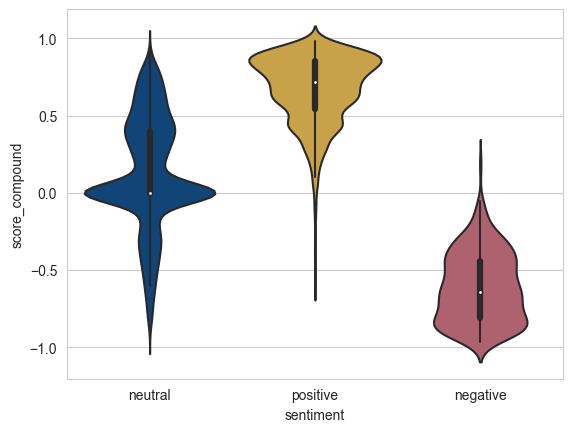

In [5]:
plt.close('all')

colors = [f"#{i}" for i in tue_palettes.high_contrast[:3]]

sns.violinplot(data=df, x='sentiment', y='score_compound', palette=colors)
plt.show()

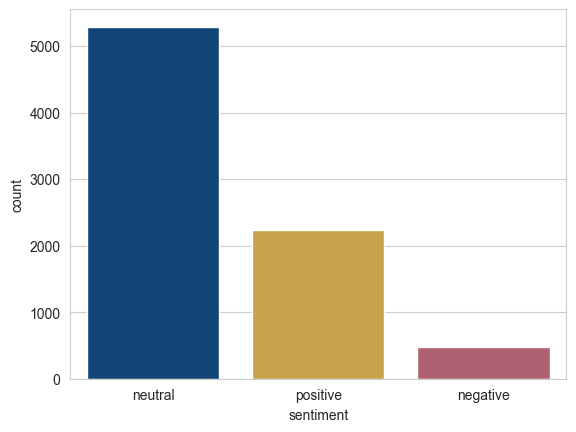

In [6]:
plt.close('all')

sns.countplot(x=df.sentiment, palette=colors)
plt.show()

In [7]:
from src.embedding import base_embedder
from sklearn import preprocessing

X = base_embedder(df.words_str.values)
y_reg = df.score_compound.values
y_clf = preprocessing.LabelEncoder().fit_transform(df.sentiment.values)

In [9]:
import plotly.express as px
import torch
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
indices = torch.randperm(len(X))[:1000]
components = pca.fit_transform(X[indices])

fig = px.scatter(components, x=0, y=1, color=y_clf[indices]).update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_gridcolor='lightgrey'
)
fig.show()
# fig.write_image("fig1.png")